In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from tqdm import tqdm
import os

In [2]:
df = pd.read_csv('../data/features/features_stats_master.csv')
df.head()

,stat,word_count,character_count,average_word_length,sentence_count,TTR,RTTR,CTTR,DMetric,Mass,...,bigram_repetition_ratio,trigram_repetition_ratio,hapax_legomena_ratio,present_participle_count,passive_voice_count,conjunction_count,pronoun_count,contraction_count,model,data
0,mean,81.119462,335.829995,4.098665,4.431050,0.787898,0.127568,4.410816,0.007521,0.030797,...,0.027324,0.007130,0.646971,2.293390,0.233949,2.597089,2.663922,0.426363,human,nyt-comments
1,std,66.091653,279.873303,0.506520,3.429274,0.117334,0.059820,1.193748,0.005743,0.014047,...,0.036388,0.020004,0.165800,2.588001,0.560714,2.870722,3.051235,0.905561,human,nyt-comments
2,min,3.000000,11.000000,1.000000,1.000000,0.074074,0.023860,0.384900,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,human,nyt-comments
3,max,450.000000,2594.000000,59.000000,84.000000,1.000000,0.577350,9.959292,1.000000,0.787954,...,0.924528,0.923077,1.000000,59.000000,14.000000,35.000000,56.000000,30.000000,human,nyt-comments
4,median,60.000000,247.000000,4.081633,3.000000,0.788462,0.114462,4.333333,0.007095,0.032267,...,0.016556,0.000000,0.629630,2.000000,0.000000,2.000000,2.000000,0.000000,human,nyt-comments


In [282]:
features = df.columns[1:-2]
results = []

In [283]:
for data in df["data"].unique():
    for model in tqdm(df["model"].unique()[1:]):
        dff = pd.read_csv(f'../data/features/data_ai/{data.replace("-", "_")}/{data}_{model}_features.csv')
        for feature in features:
            feature_ai = dff[feature].tolist()
            feature_human = dff[feature + "_base"].tolist()
            res = wilcoxon(feature_human, feature_ai)
            results.append({
                'feature': feature,
                'data': data,
                'model': model,
                'u_statistic': res.statistic,
                'p_value': res.pvalue,
                'significant': res.pvalue < 0.05
            })
            # print(f"{feature} {data} {model} u_statistic: {res.statistic}, p_value: {res.pvalue}, significant: {res.pvalue < 0.05}")

100%|██████████| 21/21 [01:00<00:00,  2.86s/it]


In [284]:
df_results = pd.DataFrame(results)
df_results.to_csv('tests.csv', index=False)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('tests.csv').sort_values(by=['feature', 'data'])
df.head()

,feature,data,model,u_statistic,p_value,significant
762,CTTR,blogs,Qwen2.5-3B-Instruct,160755140.5,1.871854e-223,True
798,CTTR,blogs,Meta-Llama-3.1-70B-Instruct-AWQ-INT4,69276641.0,0.000000e+00,True
834,CTTR,blogs,Meta-Llama-3.3-70B-Instruct-AWQ-INT4,62821519.0,0.000000e+00,True
870,CTTR,blogs,Llama-3.1-8B-Instruct,48116061.5,0.000000e+00,True
906,CTTR,blogs,gpt-4.1-nano-2025-04-14,41423824.0,0.000000e+00,True


In [3]:
custom_order = [
    "gpt-4.1-nano",
    "Llama-3.1-8B",
    "Llama-3.1-70B",
    "Llama-3.2-3B",
    "Llama-3.3-70B",
    "Phi-3-mini",
    "Phi-3-small",
    "Phi-3-medium",
    "Phi-3.5-mini",
    "Phi-4-mini",
    "phi-4",
    "Ministral-8B",
    "Mistral-Nemo",
    "Qwen2-7B",
    "Qwen2-72B",
    "Qwen2.5-3B",
    "Qwen2.5-7B",
    "Qwen2.5-14B",
    "Qwen2.5-72B",
    "Falcon3-3B",
    "Falcon3-7B"
]

In [4]:
features = [
    "word_count",
    "average_sentence_length",
    "TTR",
    "Mass",
    "noun_ratio",
    "verb_ratio",
    "flesch_reading_ease",
    "gunning_fog_index",
    "syntactic_depth",
    "dependency_distance",
    "sentiment",
    "conjunction_count",
    "discourse_marker_ratio",
    "bigram_repetition_ratio",
    "entropy_score",
]
len(features)

15

In [5]:
df = df[df['feature'].isin(features)]

In [6]:
mapping = {
    "blogs": "Blogs",
    "essays": "Essays",
    "natural-questions": "Natural Questions",
    "nyt-articles": "NYT Articles",
    "nyt-comments": "NYT Comments",
    "raid": "RAID",
    "reddit": "Reddit",
    "tweets": "Tweets",
    "writingprompts": "WritingPrompts",
    "xsum": "XSum"
}
df['data'] = df['data'].map(mapping)

In [7]:
df['model'] = df['model'].str.replace("Instruct", "")
df['model'] = df['model'].str.replace("instruct", "")
df['model'] = df['model'].str.replace("Meta-", "")
df['model'] = df['model'].str.replace("-AWQ", "")
df['model'] = df['model'].str.replace("-INT4", "")
df['model'] = df['model'].str.replace("--", "-")
df["model"] = df["model"].str.replace("-128k", "")
df['model'] = df['model'].str.replace("-2025-04-14", "")
df['model'] = df['model'].str.replace("-2407", "")
df['model'] = df['model'].str.replace("-2410", "")
df['model'] = df['model'].str.rstrip("-")

In [10]:
df.groupby('feature').sum().sort_values(by='p_value', ascending=True)

,data,model,u_statistic,p_value,significant
feature,,,,,
entropy_score,BlogsBlogsBlogsBlogsBlogsBlogsBlogsBlogsBlogsB...,Qwen2.5-3BLlama-3.1-70BLlama-3.3-70BLlama-3.1-...,2.122394e+11,0.440199,208
conjunction_count,BlogsBlogsBlogsBlogsBlogsBlogsBlogsBlogsBlogsB...,Qwen2.5-3BLlama-3.1-70BLlama-3.3-70BLlama-3.1-...,1.148461e+11,0.962550,206
syntactic_depth,BlogsBlogsBlogsBlogsBlogsBlogsBlogsBlogsBlogsB...,Qwen2.5-3BLlama-3.1-70BLlama-3.3-70BLlama-3.1-...,1.975603e+11,1.072705,207
Mass,BlogsBlogsBlogsBlogsBlogsBlogsBlogsBlogsBlogsB...,Qwen2.5-3BLlama-3.1-70BLlama-3.3-70BLlama-3.1-...,2.970823e+11,1.160601,207
gunning_fog_index,BlogsBlogsBlogsBlogsBlogsBlogsBlogsBlogsBlogsB...,Qwen2.5-3BLlama-3.1-70BLlama-3.3-70BLlama-3.1-...,1.581423e+11,1.274375,205
average_sentence_length,BlogsBlogsBlogsBlogsBlogsBlogsBlogsBlogsBlogsB...,Qwen2.5-3BLlama-3.1-70BLlama-3.3-70BLlama-3.1-...,2.783663e+11,1.340991,203
bigram_repetition_ratio,BlogsBlogsBlogsBlogsBlogsBlogsBlogsBlogsBlogsB...,Qwen2.5-3BLlama-3.1-70BLlama-3.3-70BLlama-3.1-...,9.000742e+10,1.530859,206
word_count,BlogsBlogsBlogsBlogsBlogsBlogsBlogsBlogsBlogsB...,Qwen2.5-3BLlama-3.1-70BLlama-3.3-70BLlama-3.1-...,2.070363e+11,1.697853,207
TTR,BlogsBlogsBlogsBlogsBlogsBlogsBlogsBlogsBlogsB...,Qwen2.5-3BLlama-3.1-70BLlama-3.3-70BLlama-3.1-...,2.716940e+11,1.704949,206


In [61]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker # Import ticker
import seaborn as sns
import pandas as pd # Assuming you have pandas for the DataFrame
import numpy as np # Assuming you need numpy for data generation

In [62]:
df["data_feature"] =  df["feature"] + " " + df["data"]
pivot = df.pivot(index="data_feature", columns="model", values="p_value")
pivot.sort_index(inplace=True, key=lambda x: x.str.lower())

In [64]:
existing_cols = [col for col in custom_order if col in pivot.columns]
pivot = pivot[existing_cols]

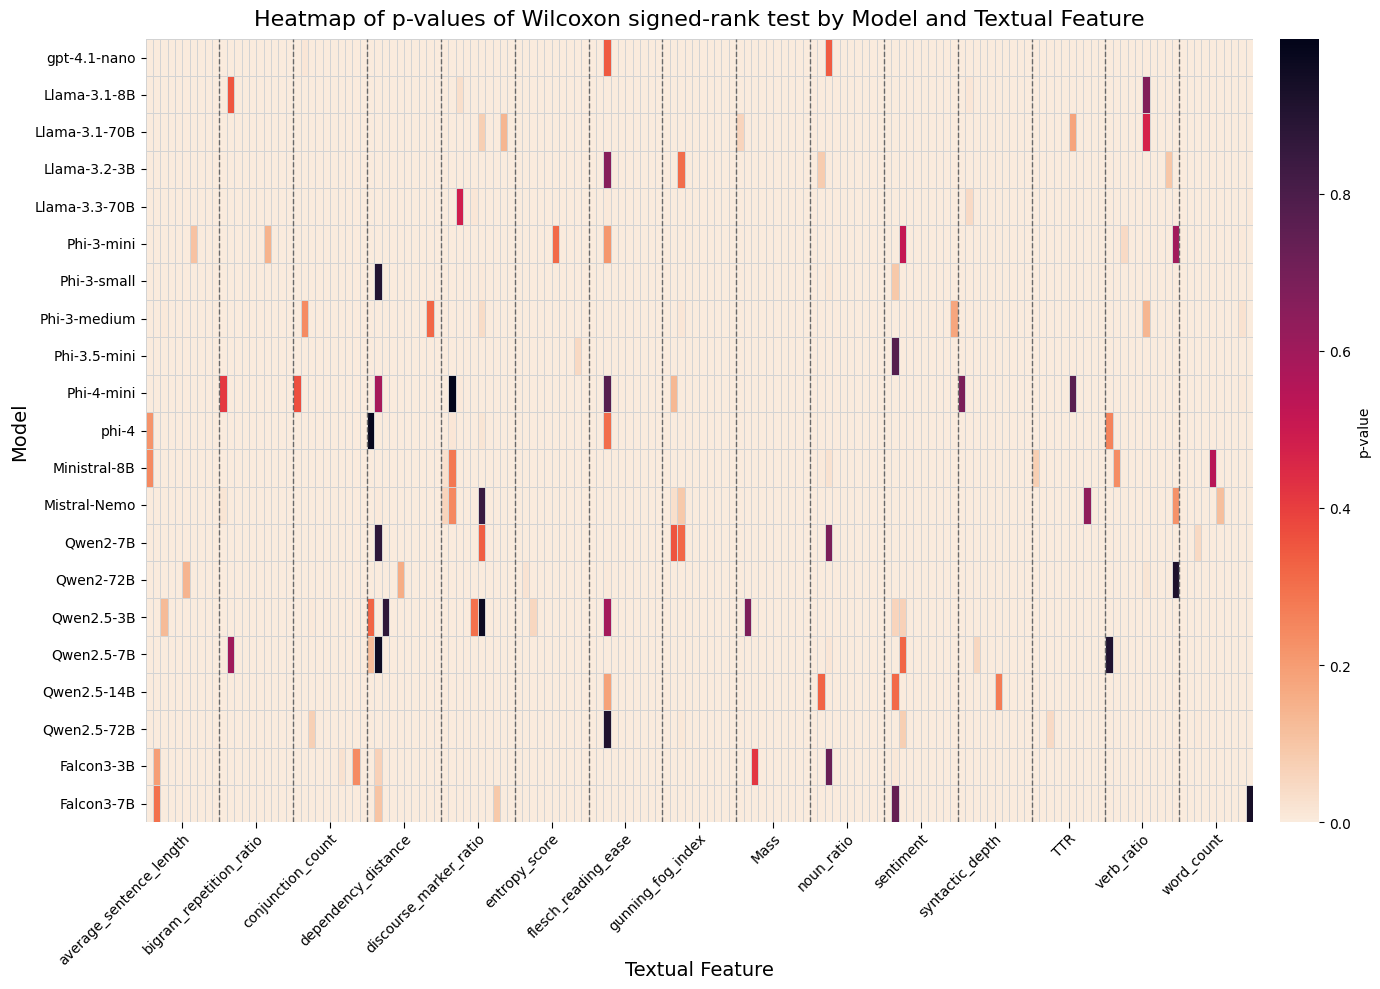

In [65]:
features.sort(key = lambda x: x.lower())
import matplotlib.ticker as mticker
fig, ax = plt.subplots(figsize=(15, 10)) # Use subplots for better axis control

sns.heatmap(
    pivot.T, # Transpose pivot so features are on x-axis, models on y-axis
    fmt=".2g",
    cmap=sns.color_palette("rocket_r", as_cmap=True),
    cbar_kws={'label': 'p-value', 'shrink': 1, 'pad': 0.02},
    linewidths=0.5,
    linecolor='lightgray',
    ax=ax # Draw on the created axes object
)

ax.set_title("Heatmap of p-values of Wilcoxon signed-rank test by Model and Textual Feature", fontsize=16, pad=10)
ax.set_xlabel("Textual Feature", fontsize=14, labelpad=-5) # Increase labelpad for spacing
ax.set_ylabel("Model", fontsize=14)

# --- Grouped X-axis Labeling ---
num_tiles = pivot.shape[0] # Total number of individual features (columns in heatmap)
group_size = 10

# 1. Calculate center positions for the group labels
# The center of group 'i' (starting at index i*group_size) is at i*group_size + (group_size/2) - 0.5
# (e.g., for group 0-9, center is 0 + 5 - 0.5 = 4.5)
center_positions = [i + (group_size / 2.0) for i in range(0, num_tiles, group_size)]

# 2. Determine the corresponding group labels
num_groups = (num_tiles + group_size - 1) // group_size # Calculate how many groups are needed
current_tick_labels = features[:num_groups] # Use the predefined group labels

# 3. Hide the original x-axis ticks (which mark every tile)
ax.xaxis.set_major_locator(mticker.NullLocator()) # Hides major ticks
ax.xaxis.set_minor_locator(mticker.NullLocator()) # Hides minor ticks

# 4. Set the new centered ticks and labels for the *groups* on a secondary axis or repositioned primary
# We'll use the primary axis but set ticks specifically.
ax.set_xticks(center_positions)
ax.set_xticklabels(
    current_tick_labels,
    rotation=45, # Adjusted rotation for potentially better fit
    ha="right",   # Center the label text on the tick position
    rotation_mode="anchor", # Anchor the rotation to the right
    fontsize=10
)
# Ensure tick marks themselves are not overly long or visible if desired
ax.tick_params(axis='x', which='major', length=4, pad=2) # length=0 hides tick line, pad adds space

# 5. Add vertical lines to visually separate the groups (Optional but recommended)
for i in range(group_size, num_tiles, group_size):
    ax.axvline(i, color='dimgray', linestyle='--', linewidth=1)

# --- Final Touches ---
plt.yticks(rotation=0, fontsize=10)
fig.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [3]:
df = pd.read_csv('../data/features/features_stats_master.csv')
results = []

In [4]:
for data in df["data"].unique():
    for model in tqdm(df["model"].unique()[1:]):
        dff = pd.read_csv(f'../data/features/data_ai/{data.replace("-", "_")}/{data}_{model}_features.csv')
        feature = "sentiment"
        feature_ai = dff[feature].tolist()
        feature_human = dff[feature + "_base"].tolist()
        res = wilcoxon(feature_human, feature_ai, alternative='less')
        results.append({
            'feature': feature,
            'data': data,
            'model': model,
            'u_statistic': res.statistic,
            'p_value': res.pvalue,
            'significant': res.pvalue < 0.05
        })
        # print(f"{feature} {data} {model} u_statistic: {res.statistic}, p_value: {res.pvalue}, significant: {res.pvalue < 0.05}")

  0%|          | 0/21 [00:00<?, ?it/s]

100%|██████████| 21/21 [00:13<00:00,  1.55it/s]


In [5]:
results = pd.DataFrame(results)
results.to_csv('sentiment_tests.csv', index=False)

In [80]:
df = pd.read_csv('sentiment_tests.csv').sort_values(by=['feature', 'data'])

In [81]:
df['model'] = df['model'].str.replace("Instruct", "")
df['model'] = df['model'].str.replace("instruct", "")
df['model'] = df['model'].str.replace("Meta-", "")
df['model'] = df['model'].str.replace("-AWQ", "")
df['model'] = df['model'].str.replace("-INT4", "")
df['model'] = df['model'].str.replace("--", "-")
df["model"] = df["model"].str.replace("-128k", "")
df['model'] = df['model'].str.replace("2025-04-14", "")
df['model'] = df['model'].str.replace("-2407", "")
df['model'] = df['model'].str.replace("-2410", "")
df['model'] = df['model'].str.rstrip("-")

In [82]:
datas_names = ["Blogs", "Essays", "Natural Questions", "NYT Articles", "NYT Comments", "RAID", "Reddit", "Tweets", "WritingPrompts", "XSum"]

In [83]:
pivot = df.pivot(index="model", columns="data", values="p_value")
pivot.sort_index(inplace=True)

In [84]:
existing_index = [model for model in custom_order if model in pivot.index]
pivot = pivot.loc[existing_index]

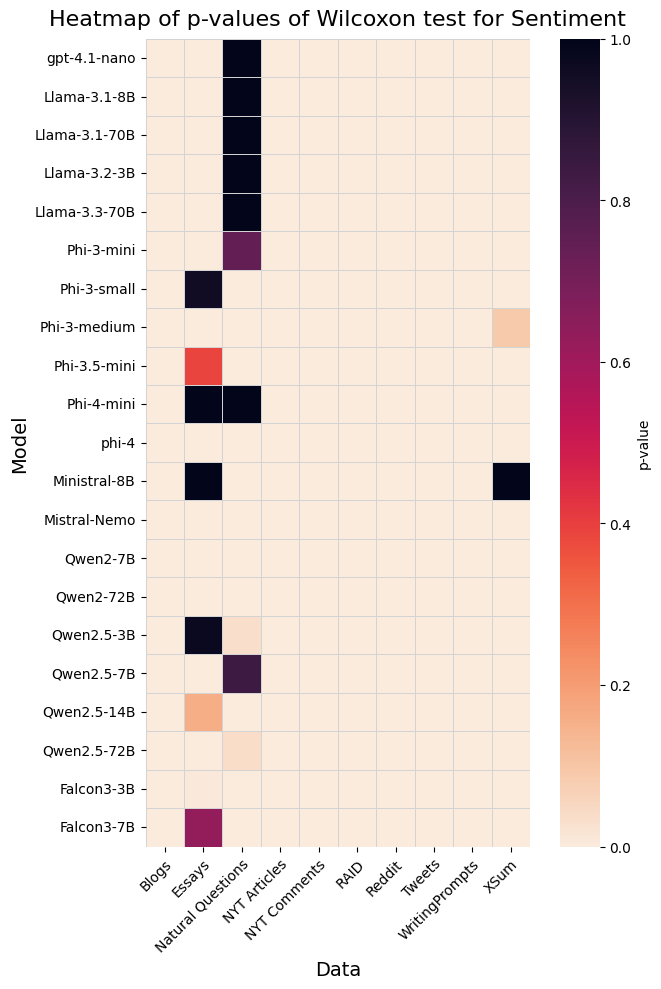

In [85]:
fig, ax = plt.subplots(figsize=(15, 10))  # Use subplots for better axis control

sns.heatmap(
    pivot,  # Transpose pivot so features are on x-axis, models on y-axis
    fmt=".2g",
    cmap=sns.color_palette("rocket_r", as_cmap=True),
    cbar_kws={'label': 'p-value', 'shrink': 1, 'pad': 0.02},
    linewidths=0.5,
    linecolor='lightgray',
    square=True,
    ax=ax  # Draw on the created axes object
)

ax.set_title("Heatmap of p-values of Wilcoxon test for Sentiment", fontsize=16, pad=10)
ax.set_xlabel("Data", fontsize=14)
ax.set_ylabel("Model", fontsize=14)
ax.set_xticklabels(
    datas_names,
    rotation=45,  # Adjusted rotation for potentially better fit
    ha="right",   # Center the label text on the tick position
    rotation_mode="anchor",  # Anchor the rotation to the right
    fontsize=10
)
fig.tight_layout()  # Adjust layout to prevent labels overlapping
plt.show()